# Diabetes Prediction
##### BBAN3001 Group Assignment
---

<!-- Paper by
| First Name    | Last Name     | E-Mail     |
|--------------|--------------|--------------|
| Elena| Schmidhuber| elenaasc@stud.ntnu.no|
| Natalie| Sporrer| natalbsp@stud.ntnu.no|
| Fabian| Rippel| fjrippel@stud.ntnu.no|
| Joachim| Haug| joachikh@stud.ntnu.no|
| Clemens| Büchter| clemenbu@stud.ntnu.no| -->
Dataset by [Kaggle](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data)

### Table of content

1. Introduction
2. Descriptive analysis 
3. Visualization of the data
4. Statistical analysis  
4.1 Correlation analysis  
4.2 Logistic Regression  
5. Results
6. Discussion
7. Conclusion

## 1. Introduction

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
# Loading the dataset
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

## 2. Descriptive analysis

In [168]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [169]:
df.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [170]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [172]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

#### Preparation of Dataset

In [173]:
# convert all columns to ints   
df = df.astype(int)

In [174]:
# rename Diabtes_012 to Diabetes
df.rename(columns={'Diabetes_binary': 'Diabetes'}, inplace=True)

In [175]:
#Checking The Null Values
df.isnull().sum()
# result shows that there is no missing values in dataset df

Diabetes                0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [176]:
# check for duplicate rows
df.duplicated().sum()
# not important for us to drop duplicates

24206

In [177]:
# proof that dataset is imbalanced
df.Diabetes.value_counts() #-> imbalanced dataset

Diabetes
0    218334
1     35346
Name: count, dtype: int64

In [ ]:
## 3. Visualization of the data

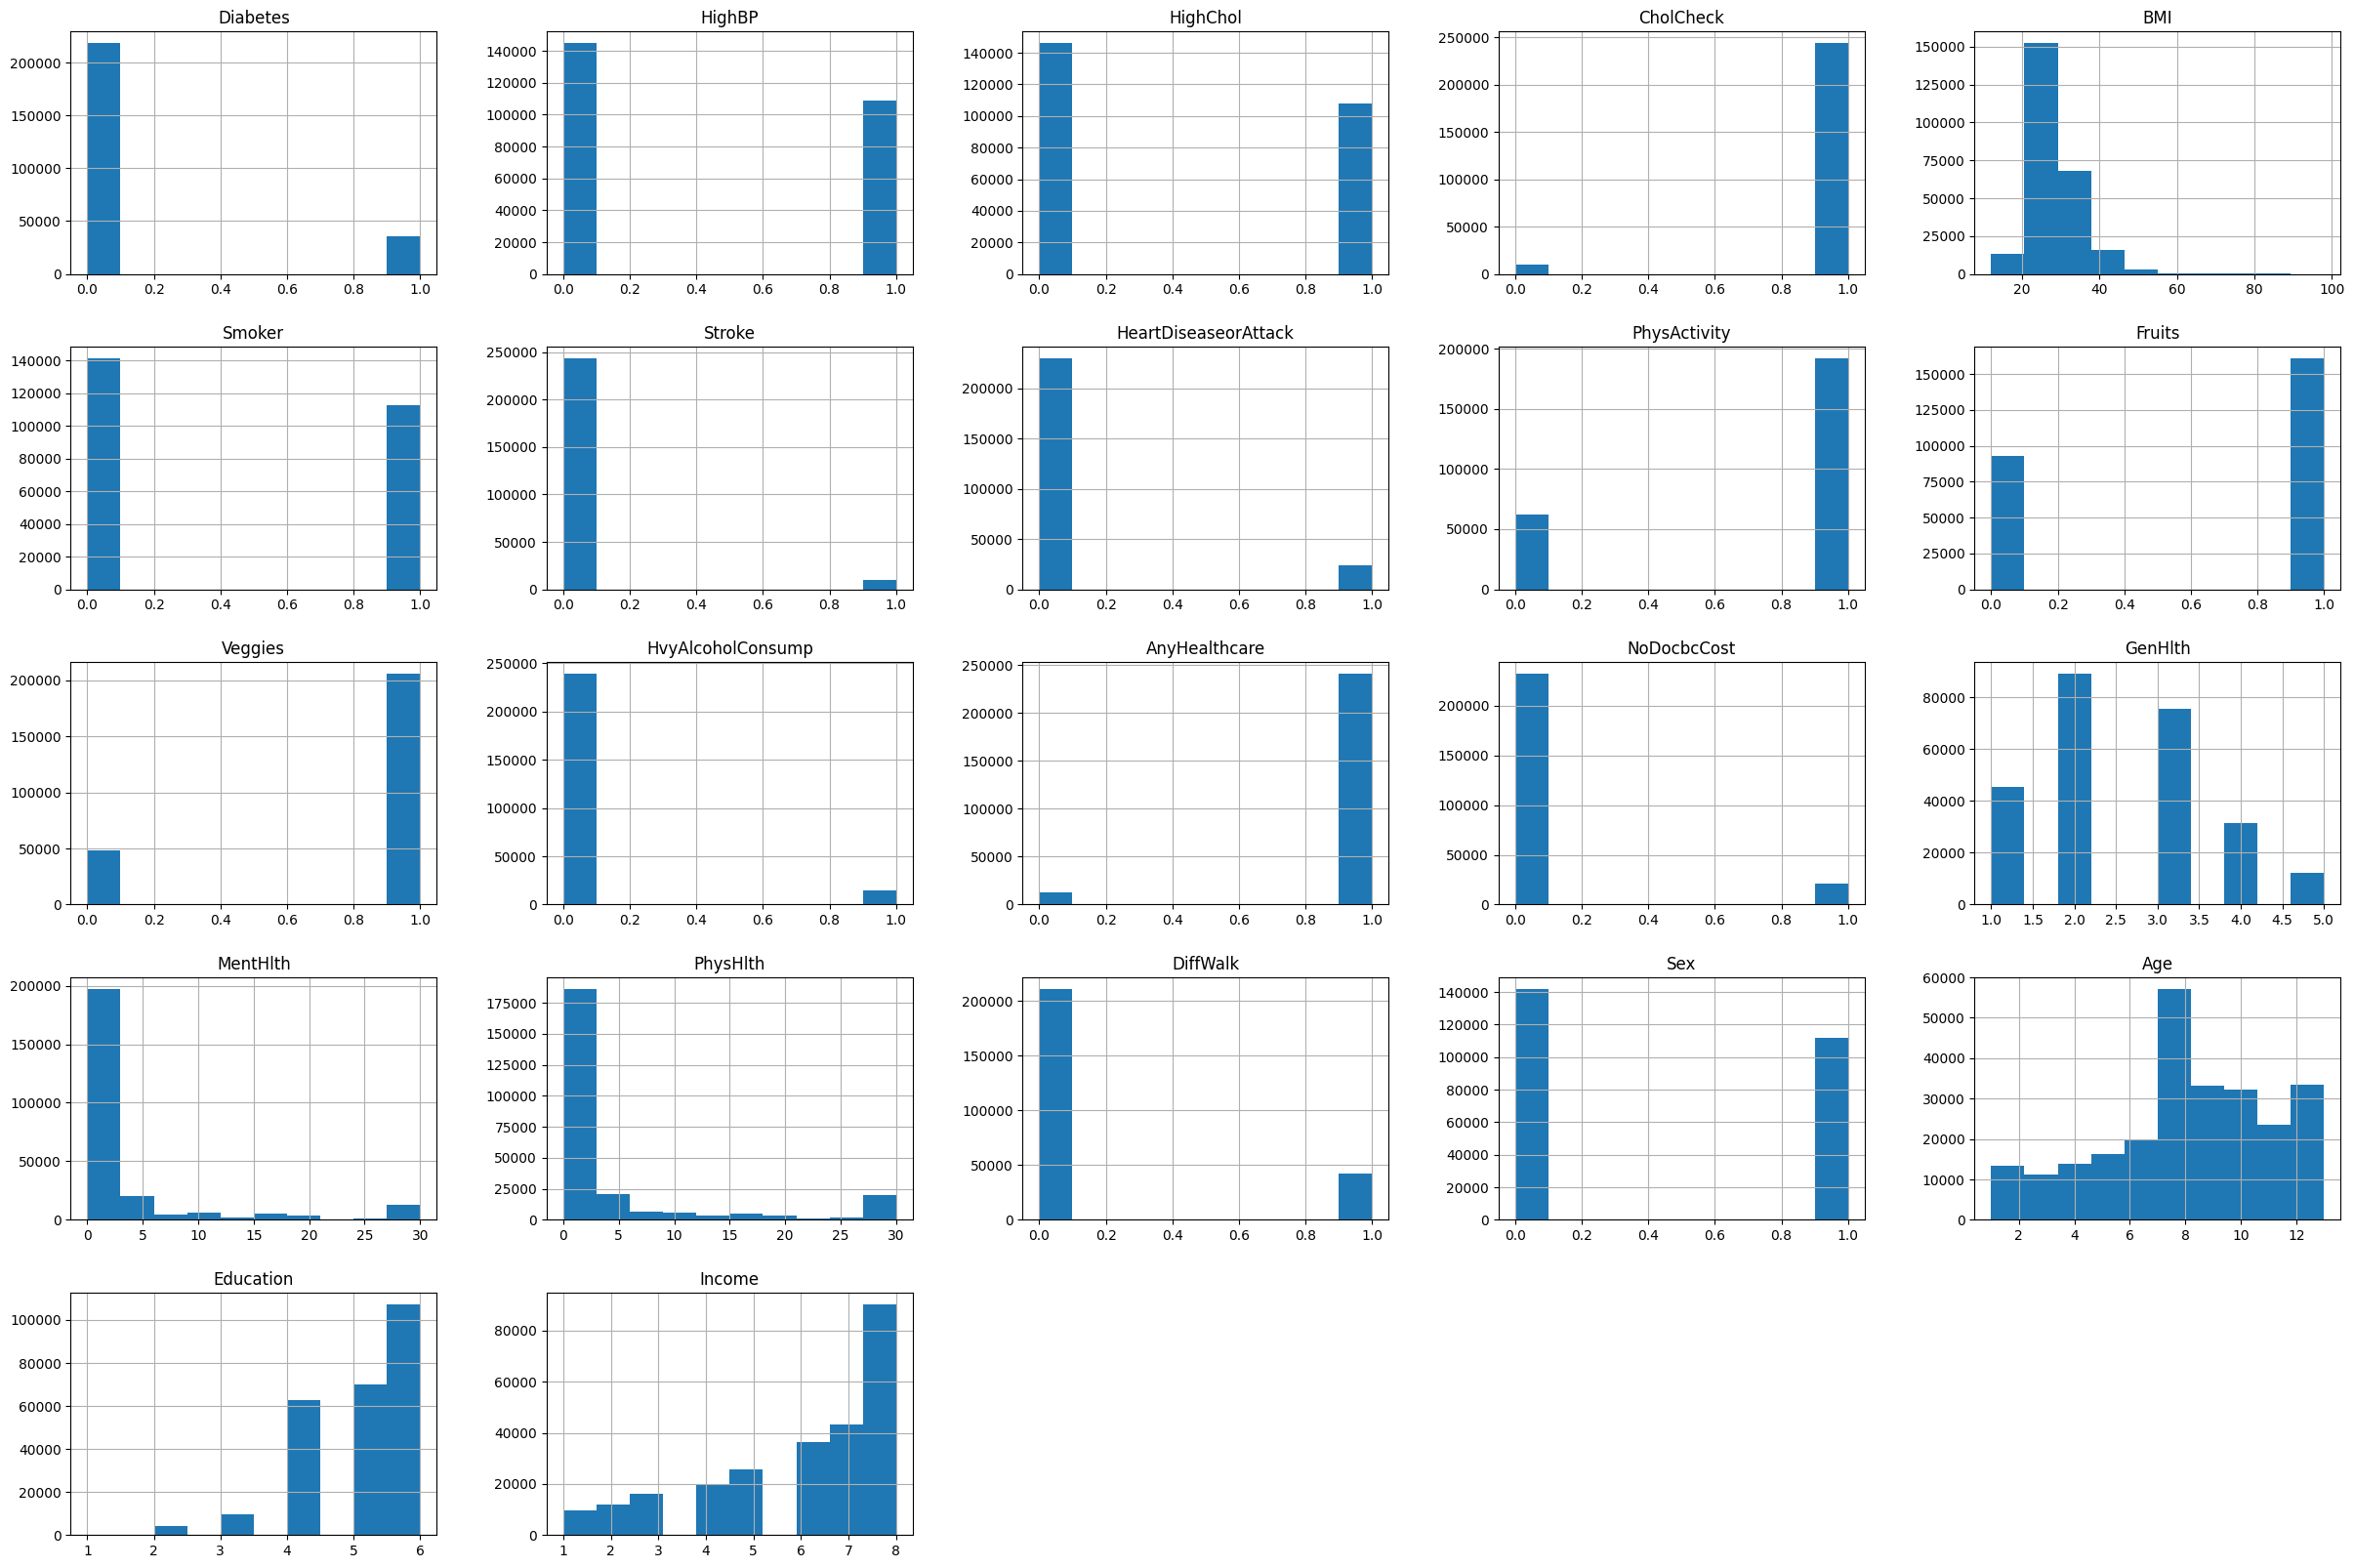

In [178]:
df.hist(figsize=(30,20));

## 4. Statistical Analysis

### 4.1 Correlation Analysis

In a comprehensive statistical analysis, we have explored the correlations between various factors and the presence of diabetes, showing possible influencing factors of an individual's risk of developing this chronic health condition.
Therefore, we create a correlation matrix to better understand the correlations between the several aspects of the dataset. Moreover, the heatmap displays the strength and direction of the linear relationships between variables.


In [ ]:
#Heatmap of correlation

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot=True).set_title('Correlation Heatmap')

Consequently, the primary focus is on analyzing the correlations between the dependent variable 'Diabetes' and other variables, such as 'GenHlth.' This analysis aims to better understand the factors influencing the likelihood of having diabetes.

In [179]:
#checking abs correlation between columns of dataset df
## hier sollten wir nicht die abs verwenden corr_matrix = abs(df.corr())
corr_matrix['Diabetes'].sort_values(ascending=False)

##!! hier sollten wir nicht die abs verwenden !! 

Diabetes                1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Income                  0.163919
Education               0.124456
PhysActivity            0.118133
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
HvyAlcoholConsump       0.057056
Veggies                 0.056584
Fruits                  0.040779
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Name: Diabetes, dtype: float64

<Axes: >

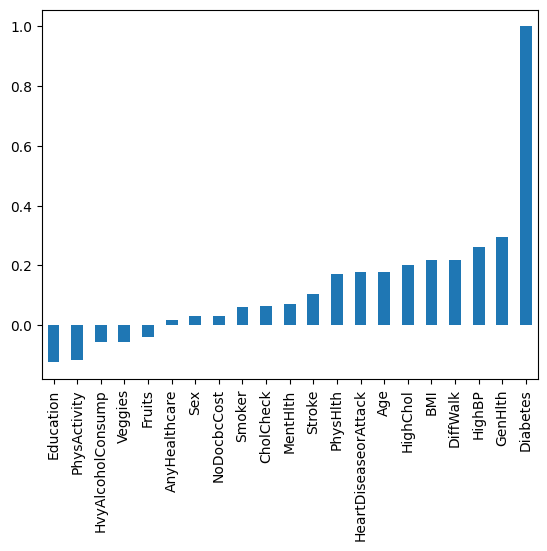

In [181]:
#Plot correlation between the variables and Diabetes
df.corr()['Diabetes'][:-1].sort_values().plot(kind='bar')

The bar plot displayed above visualizes the results of the correlation analysis, providing a clear depiction of the strength of the relationships between specific variables and diabetes. These influences can be categorized into two distinct groups, the positive and negative influence on diabetes. The first group, including 'Education,' 'PhysActivity,' 'HvyAlcoholConsumption,' 'Veggies,' and 'Fruits,' exhibits negative correlations with diabetes, indicating a potential protective effect. 

- Consumption of Fruits (Fruits) (-0.040779): A negative correlation between fruit consumption and diabetes suggests that a diet rich in fruits may be associated with a lower risk.

- Consumption of Vegetables (Veggies) (-0.056584): Similarly, vegetable consumption displays a negative correlation with diabetes, though the correlation is not particularly strong.

- Heavy Alcohol Consumption (HvyAlcoholConsump) (-0.057056): Heavy alcohol consumption, intriguingly, exhibits a negative correlation with diabetes. While this negative correlation is relatively weak, it suggests that heavy alcohol consumption might be associated with a reduced risk of diabetes, though this relationship requires further exploration.

- Physical Activity (-0.118133): Physical activity demonstrates a negative correlation with diabetes, indicating that a more active lifestyle may reduce the risk of developing diabetes.

- Education (-0.124456): The correlation of -0.124456 indicates that education exhibits a negative correlation with diabetes. This implies that higher levels of education may be associated with a lower risk of diabetes.

In contrast, the second group comprises all remaining variables, such as 'Age,' 'Sex,' and 'Smoker,' which show positive correlations, suggesting an increased risk of developing diabetes. 


- Availability of Any Healthcare (AnyHealthcare) (0.016255): Access to any form of healthcare services displays a weak positive correlation with diabetes.

- Sex (0.031430): Gender, represented here as 'Sex,' shows a weak positive correlation of 0.031430 with diabetes, implying that there may be gender-based differences in diabetes risk.

- No access to Healthcare because of the Costs (NoDocbcCost) (0.031433): Having no access to healthcare services because of its financial barriers exhibits a weak positive correlation with diabetes, indicating that limited access to healthcare may be a risk factor.

- Smoking (0.060789): Smoking is positively correlated with diabetes, although the correlation of 0.060789 is not particularly strong. This underscores the importance of not smoking for diabetes prevention.

- Cholesterol Checks (CholCheck) (0.064761): Regular cholesterol checks have a weak positive correlation with diabetes, indicating that individuals who do not monitor their cholesterol levels may be at slightly higher risk.

- Mental Health (MentHlth) (0.069315): Mental health also exhibits a positive correlation with diabetes, suggesting that individuals with poorer mental health may be at a slightly higher risk of 0.069315.

- Stroke (0.105816): Stroke, while positively correlated with diabetes, has a weaker association of 0.105816. Meaning that having had a stroke increases the likelihood of getting diabetes slightly.

- Income (0.163919): Income levels are positively correlated with diabetes, implying that higher income may be associated with a reduced risk of diabetes.

- Physical Health (PhysHlth) (0.171337): An individual's physical health exhibits a positive correlation with diabetes. This suggests that individuals with poorer physical health may be at a higher risk of developing diabetes.

- History of Heart Disease or Heart Attack (HeartDiseaseorAttack) (0.177282): A history of heart disease or heart attacks shares a similar level of positive correlation with diabetes, indicating that these conditions may have common risk factors.

- Age (0.177442): Age shows a significant positive correlation with diabetes, aligning with the well-established understanding that diabetes risk increases with age.

- High Cholesterol (HighChol) (0.200276): High cholesterol levels are positively correlated with diabetes, emphasizing the importance of cholesterol management for diabetes prevention.

- Body Mass Index (BMI) (0.216843): Body Mass Index, a measure of body fat, is also significantly positively correlated with diabetes. Higher BMI values are commonly linked to an increased risk of diabetes.

- Difficulty in Walking (DiffWalk) (0.218344): Difficulty in walking, often associated with mobility issues, exhibits a moderate positive correlation with diabetes. This implies that mobility challenges may contribute to the risk of diabetes.

- High Blood Pressure (HighBP) (0.263129): High blood pressure, or hypertension, displays a strong positive correlation with diabetes, indicating that individuals with hypertension may be more predisposed to diabetes.

- General Health (GenHlth) (0.293569): A significant positive correlation exists between an individual's perception of their general health and the likelihood of having diabetes. This suggests that individuals who rate their general health lower may be at an elevated risk of diabetes.



### 4.2 Logistic Regression


Intro Text Logistic Regression

To analyze our data further important packages have been imported. 

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

Next, the dataset is splitted into the features and target variable.

In [183]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

And in the following further divided into a train and test set using a fixed random state in order to be able to reciprocate results. Wherby the training set comprises 80 % of the overall data and the test set 20%. 

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

To be able to better elaborate on the given data we trained a logistic regression model with a maximum of 1000 iterations.

In [185]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Predictions on test data

Intro:


In [186]:
# Prediciting the test results
y_pred = logreg.predict(X_test)

In [188]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report
#print accuracy
print(f'Test Accuracy: {accuracy}'"\n")

# display metrics in sentences
print(f'Accuracy: {accuracy}'"\n")
print(f'Confusion Matrix: \n{conf_matrix}'"\n")
print(f'Classification Report: \n{class_report}')

Test Accuracy: 0.8658152002522863
Accuracy: 0.8658152002522863
Confusion Matrix: 
[[42770   969]
 [ 5839  1158]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.54      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736



In the following the confusion matrix for the test and training set is visualized to underline the results.

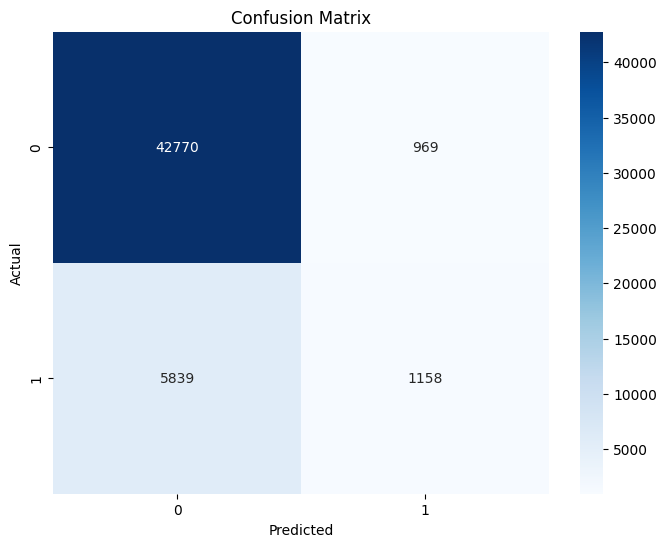

In [189]:
# visualize confusion matrix for test and train set

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix');


In general a confusion matrix aims to illustrate ....
- true/false negatives
- true/false positives

#### Predictions on training data

In [190]:
# Predict the training results
y_pred_train = logreg.predict(X_train)

In [191]:
# Evaluating the training model
accuracy_train = accuracy_score(y_train, y_pred_train)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)

In [192]:
# display metrics in sentences for training set
print(f'Train Accuracy: {accuracy_train}')
print(f'Confusion Matrix: \n{conf_matrix_train}')

Train Accuracy: 0.8630311810154525
Confusion Matrix: 
[[170776   3819]
 [ 23978   4371]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.92    174595
           1       0.53      0.15      0.24     28349

    accuracy                           0.86    202944
   macro avg       0.71      0.57      0.58    202944
weighted avg       0.83      0.86      0.83    202944



Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.92    174595
           1       0.53      0.15      0.24     28349

    accuracy                           0.86    202944
   macro avg       0.71      0.57      0.58    202944
weighted avg       0.83      0.86      0.83    202944



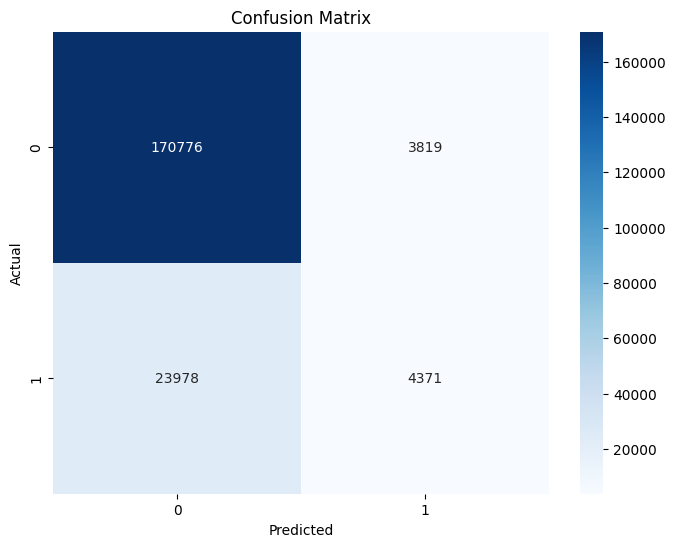

In [204]:
# visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix');

print(f'Classification Report: \n{class_report_train}')

# Using an balanced dataset to improve predictions

In [ ]:
#Loading the dataset
dfn = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
dfn.head()

Since same overall dataset we can skip some steps....

In [ ]:
# convert all columns to ints   
dfn = dfn.astype(int)

In [ ]:
# rename Diabtes_012 to Diabetes
dfn.rename(columns={'Diabetes_binary': 'Diabetes'}, inplace=True)

In [ ]:
#value count
dfn.Diabetes.value_counts()

In [ ]:
#Analyzing the balanced dataset
df.hist(figsize=(30,20));

Describe some variables where distrubution is very different -> connection to correlation

## Correlation

In [ ]:
#checking abs correlation between columns of dataset dfn

corr_matrix = abs(dfn.corr())
corr_matrix['Diabetes'].sort_values(ascending=False)

In [ ]:
#Heatmap of correlation

plt.figure(figsize = (20,20))
sns.heatmap(dfn.corr(),annot=True).set_title('Correlation Heatmap')

In [ ]:
#Plot correlation between the variables and Diabetes

dfn.corr()['Diabetes'][:-1].sort_values().plot(kind='bar')

## Logistic Regression

In [ ]:
# Splitting dataset in features and target variable
Xn = dfn.drop('Diabetes', axis=1)
yn = dfn['Diabetes']

In [ ]:
#80 training 20 test
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2, random_state=42) 

In [ ]:
# Training a logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(Xn_train, yn_train)

#### Predictions on test set

In [ ]:
# Prediciting the test results
yn_pred = logreg.predict(Xn_test)

In [ ]:
# Evaluating the model
accuracy = accuracy_score(yn_test, yn_pred)
conf_matrix = confusion_matrix(yn_test, yn_pred)
class_report = classification_report(yn_test, yn_pred)

In [ ]:
accuracy, conf_matrix, class_report
#print accuracy
print(f'Test Accuracy: {accuracy}')

# display metrics in sentences
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')

In [ ]:
# visualize confusion matrix for test and train set

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix');

#### Predictions on training set

In [ ]:
# Predict the training results
yn_pred_train = logreg.predict(X_train)

In [ ]:
# Evaluating the training model
accuracy_train = accuracy_score(yn_train, yn_pred_train)
conf_matrix_train = confusion_matrix(yn_train, yn_pred_train)
class_report_train = classification_report(yn_train, yn_pred_train)

In [ ]:
# display metrics in sentences for training set
print(f'Train Accuracy: {accuracy_train}')
print(f'Confusion Matrix: \n{conf_matrix_train}')

In [ ]:
# visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix_train, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix');

print(f'Classification Report: \n{class_report_train}')